<a href="https://colab.research.google.com/github/2468UNIVERSE/Fraud-Detection-Using-ANN/blob/main/Fraud_Detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection using Artificial Neural Networks (ANN)**

This project aims to build a machine learning model using an Artificial Neural Network (ANN) to detect fraudulent credit card transactions. The dataset used (creditcard.csv) contains anonymized features representing transaction details, along with a Class label indicating fraud (1) or legitimate (0).

# **Key Steps in the Project:**

**1- Data Preprocessing:**

*   Loaded the dataset and removed duplicates.
    link for the dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
*   Dropped the Time column as it does not contribute to fraud detection.
*   Applied StandardScaler on the Amount column to normalize transaction amounts.


**2- Handling Class Imbalance:**

Used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset by oversampling the minority class (fraud cases).

**3- Feature Scaling:**

Applied MinMaxScaler to scale all features between 0 and 1 for better neural network performance.

**4- Data Splitting:**

Split the data into training and testing sets using the holdout method with an 80/20 split, maintaining class proportions with stratification.

**5- Model Building: Designed a feedforward ANN with:**

*   3 hidden layers using ReLU activation and dropout for regularization.
*   A final output layer with sigmoid activation for binary classification.
*   Compiled the model with binary_crossentropy loss and the adam optimizer.
*   Trained the model for 15 epochs with early stopping enabled.

**6- Model Evaluation:**

*   Evaluated the model on the test set and printed accuracy.
*   Used a threshold of 0.4 to convert probabilities to binary predictions (this helps improve recall for fraud detection).
*   Displayed classification report (precision, recall, F1-score) and confusion matrix as a heatmap.



In [151]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
pd.options.display.max_columns = None
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print('Number of columns: {}'.format(df.shape[1]))
print('Number of rows: {}'.format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
df = df.drop(['Time'], axis = 1)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
df.duplicated().any()

np.True_

In [17]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(275663, 30)

In [20]:
df['Class'].value_counts()

,count
Class,
0,275190
1,473


In [21]:
#dividing the dataset into main and target
X = df.drop(columns= ['Class'])
Y = df['Class']

In [22]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [23]:
Y.value_counts()

,count
Class,
0,275190
1,473


In [24]:
# handling the imblance dataset using smote technique

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, Y = smote.fit_resample(X, Y)

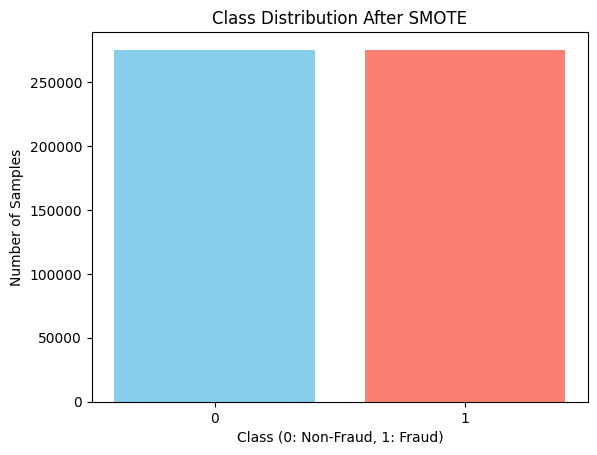

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of instances for each class
counter = Counter(Y)

# Plot the class distribution
plt.bar(counter.keys(), counter.values(), color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Samples')
plt.xticks([0, 1])
plt.show()


In [26]:
Y.value_counts()

,count
Class,
0,275190
1,275190


In [27]:
X.shape

(550380, 29)

In [28]:
# data normalization

X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000
mean,-2.187514,1.713782,-3.295112,2.197695,-1.476624,-0.743630,-2.532754,0.568553,-1.280956,-2.726732,1.855336,-3.018410,-0.054921,-3.436361,-0.016747,-1.991537,-3.240745,-1.069095,0.335457,0.205249,0.250033,0.038185,-0.032683,-0.057990,0.037100,0.025069,0.118643,0.047404,0.040987
std,5.272184,3.479703,5.974498,3.133091,4.045409,1.604934,5.412376,3.710186,2.247297,4.306815,2.713684,4.457169,1.003694,4.579422,0.926071,3.407832,5.899474,2.369589,1.234951,0.980771,1.752943,0.894855,0.869805,0.542917,0.613935,0.440586,0.877832,0.417221,0.927318
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229
25%,-2.615877,-0.127168,-4.834616,-0.097675,-1.658763,-1.530451,-2.826259,-0.177551,-2.245327,-4.432210,-0.199871,-5.314711,-0.785889,-6.593682,-0.555226,-3.245882,-5.170919,-1.646539,-0.408588,-0.176243,-0.156669,-0.499135,-0.221248,-0.385122,-0.294283,-0.273449,-0.056962,-0.048559,-0.341275
50%,-0.722401,0.973875,-1.338959,1.318870,-0.422985,-0.678672,-0.626674,0.165722,-0.740096,-0.866802,1.098758,-0.787807,-0.042608,-1.012425,0.024434,-0.594546,-0.506262,-0.331039,0.235133,0.050212,0.154977,0.035731,-0.039624,-0.006058,0.045993,-0.009996,0.055600,0.039121,-0.258595
75%,0.993528,2.709723,0.365150,4.088804,0.472496,0.013364,0.300723,0.856945,0.135016,0.010562,3.464432,0.201391,0.637488,0.105567,0.631761,0.305185,0.268219,0.365772,0.997654,0.426469,0.632860,0.536382,0.164279,0.337793,0.383913,0.309562,0.458028,0.215452,0.046539
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [30]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000,550380.000000
mean,0.921131,0.785341,0.780314,0.349352,0.755776,0.255543,0.249926,0.791484,0.418653,0.452307,0.395615,0.590428,0.444080,0.530511,0.335075,0.386018,0.636967,0.579763,0.589511,0.582451,0.565510,0.511812,0.664948,0.374420,0.579989,0.429543,0.418701,0.314086,0.003838
std,0.089568,0.036716,0.103530,0.138887,0.027234,0.016136,0.032973,0.039799,0.077415,0.089106,0.161371,0.167992,0.077693,0.153976,0.069230,0.108374,0.171415,0.162972,0.096439,0.010443,0.028258,0.041745,0.012917,0.073158,0.034462,0.071969,0.016203,0.008467,0.009028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.913853,0.765917,0.753637,0.247600,0.754550,0.247632,0.248138,0.783481,0.385432,0.417021,0.273400,0.503880,0.387498,0.424350,0.294820,0.346128,0.580884,0.540049,0.531408,0.578389,0.558954,0.486746,0.662148,0.330339,0.561388,0.380781,0.415460,0.312138,0.000116
50%,0.946021,0.777534,0.814211,0.310395,0.762869,0.256196,0.261538,0.787163,0.437285,0.490788,0.350624,0.674500,0.445033,0.612012,0.338154,0.430444,0.716420,0.630524,0.581677,0.580800,0.563978,0.511698,0.664845,0.381418,0.580488,0.423815,0.417537,0.313918,0.000921
75%,0.975173,0.795850,0.843741,0.433183,0.768897,0.263154,0.267188,0.794578,0.467431,0.508941,0.491301,0.711783,0.497677,0.649603,0.383556,0.459057,0.738923,0.678449,0.641223,0.584806,0.571681,0.535053,0.667873,0.427752,0.599457,0.476015,0.424965,0.317496,0.003892
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# splitting the data set into train and test using holdout method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42, stratify= Y)


In [32]:
X_train.shape, X_test.shape

((440304, 29), (110076, 29))

In [33]:
Y_train.value_counts()

,count
Class,
1,220152
0,220152


In [34]:
Y_test.value_counts()

,count
Class,
0,55038
1,55038


In [122]:
# building the artificial neural network

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# model = keras.Sequential([
#     # input layer + hidden layer 1
#     keras.layers.Dense(16, input_shape = (29,), activation = 'relu'),
#     # hidden layer 2
#     keras.layers.Dense(8, activation = 'relu'),
#     # output layer
#     keras.layers.Dense(1, activation = 'sigmoid')
# ])

model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(29,), activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 15, batch_size = 200, callbacks= early_stop )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8896 - loss: 0.2615
Epoch 2/15
   6/2202 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9507 - loss: 0.1307  

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


2202/2202 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9397 - loss: 0.1500
Epoch 3/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9419 - loss: 0.1419
Epoch 4/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9438 - loss: 0.1360
Epoch 5/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9458 - loss: 0.1291
Epoch 6/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9469 - loss: 0.1275
Epoch 7/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9471 - loss: 0.1257
Epoch 8/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9481 - loss: 0.1253
Epoch 9/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9483 - loss: 0.1249
Epoch 10/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9478 - loss: 0.1255
Epoch 11/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9494 - loss: 0.1220
Epoch 12/15
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9514 - loss: 0.1187
Epoch 13/15
2202/2202 ━━━━━━━━━

In [123]:
# model evaluation on testing set

loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Model Accuracy : {accuracy*100}')


3440/3440 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9651 - loss: 0.0862
Model Accuracy : 96.59507870674133


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [124]:
# to make predictions

pred = model.predict(X_test)

3440/3440 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
pred[:5]

array([[3.4860093e-09],
       [8.2799184e-01],
       [9.9916452e-01],
       [9.9987620e-01],
       [3.4629691e-02]], dtype=float32)

In [137]:
binary_pred = (pred > 0.4).astype(int)

In [109]:
binary_pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [110]:
Y_test[:10]

,Class
232789,0
226523,0
391670,1
546170,1
127175,0
85937,0
7614,0
521166,1
11480,0
179616,0


In [148]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, binary_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     55038
           1       0.96      0.97      0.97     55038

    accuracy                           0.96    110076
   macro avg       0.97      0.96      0.96    110076
weighted avg       0.97      0.96      0.96    110076



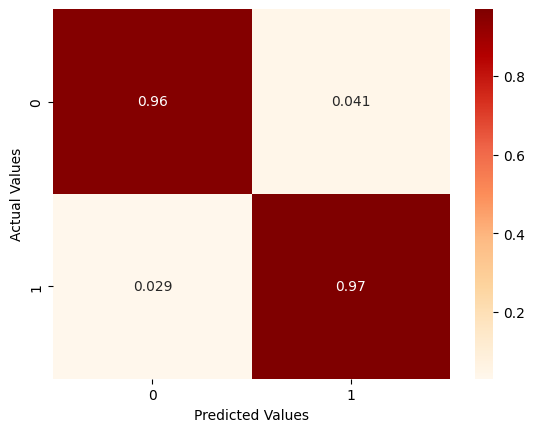

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(Y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()